# 1.Импортирование данных и библиотек

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [2]:
df_cost = pd.read_parquet('df_cost.parquet')
df_transaction = pd.read_parquet('transaction_df.parquet')
df_weather = pd.read_parquet('weather_df.parquet')
df_competitors = pd.read_parquet('df_competitors.parquet')

# 2.Изучение и изменение исходных данных

Начнём исследование данных с изучения исходных таблиц и их изменения, в случае необходимости

## 1) Таблица себестоимости

В данной таблице отражена себестоимость товаров по городам

In [3]:
df_cost

,place,product,cost,date
0,Анор Лондо,Целебные травы,2.07,2216-01-02
1,Анор Лондо,Целебные травы,3.07,2216-01-26
2,Анор Лондо,Целебные травы,3.30,2216-02-12
3,Анор Лондо,Целебные травы,4.04,2216-03-06
4,Анор Лондо,Целебные травы,3.88,2216-03-27
...,...,...,...,...
1112,Фалькония,Эстус,3.10,2218-07-29
1113,Фалькония,Эстус,7.20,2218-08-10
1114,Фалькония,Эстус,3.31,2218-08-27
1115,Фалькония,Эстус,3.26,2218-09-16


In [4]:
df_cost.describe()

,cost
count,1117.000000
mean,6.859955
std,3.856876
min,1.180000
25%,3.910000
50%,5.930000
75%,8.860000
max,24.520000


In [5]:
df_cost['product'].value_counts()

Эльфийская пыльца    464
Эстус                381
Целебные травы       272
Name: product, dtype: int64

In [6]:
df_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117 entries, 0 to 1116
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   place    1117 non-null   object        
 1   product  1117 non-null   object        
 2   cost     1117 non-null   float64       
 3   date     1117 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 35.0+ KB


In [7]:
df_cost.isna().sum()

place      0
product    0
cost       0
date       0
dtype: int64

Видим, что отсутствуют нулевые значения.

Text(0.5, 0, 'Эстус')

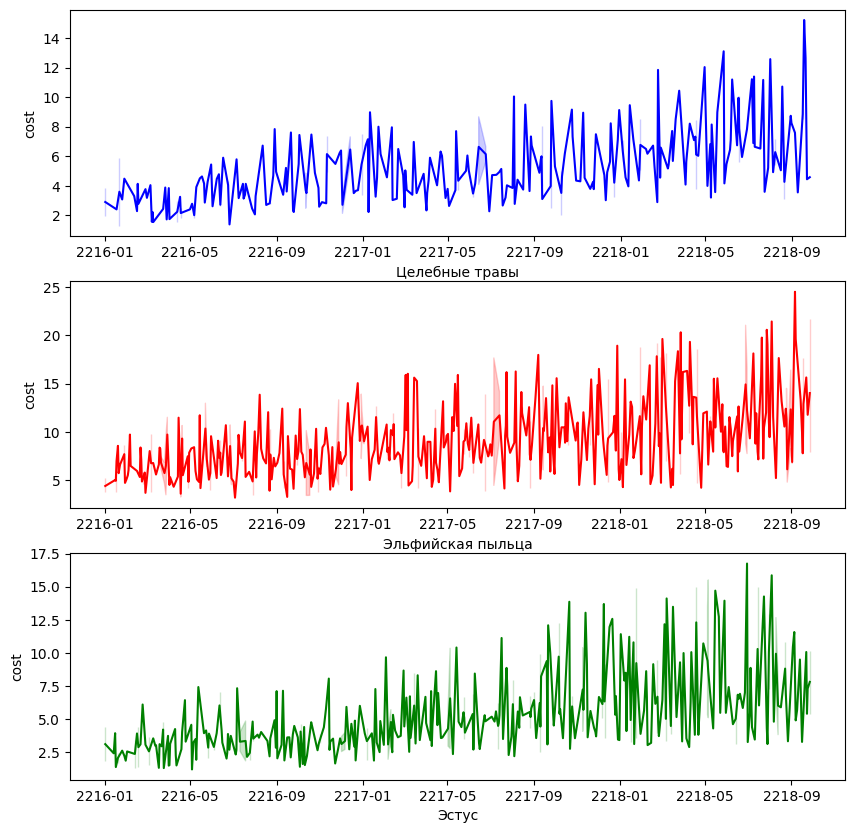

In [8]:
fig, ax = plt.subplots(3, 1, figsize=(10,10))
sns.lineplot(x='date', y='cost', data=df_cost[df_cost['product'] == 'Целебные травы'], ax=ax[0], color='b')
sns.lineplot(x='date', y='cost', data=df_cost[df_cost['product'] == 'Эльфийская пыльца'], ax=ax[1], color='r')
sns.lineplot(x='date', y='cost', data=df_cost[df_cost['product'] == 'Эстус'], ax=ax[2], color='g')
ax[0].set_xlabel('Целебные травы')
ax[1].set_xlabel('Эльфийская пыльца')
ax[2].set_xlabel('Эстус')

По графикам видно, что с течением времени дисперсия увеличивается.

<Axes: xlabel='product', ylabel='cost'>

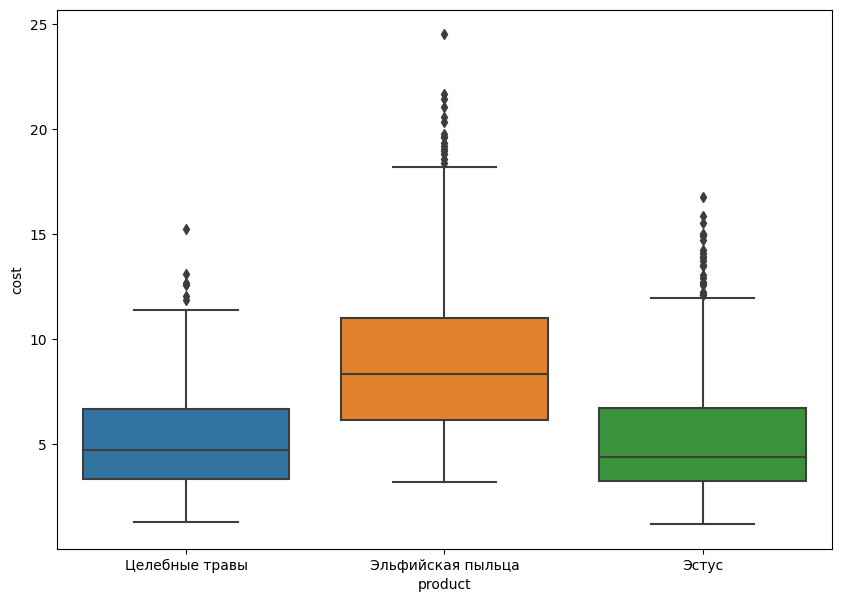

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10,7))
sns.boxplot(x='product', y='cost', data=df_cost)

По графику box-and-whisker видим, что есть значимые выбросы, которые на самом деле являются следствием повышения себестоимости товаров за последний рассматриваемый период(примерно с начала 2218).

## 2) Таблица транзакций

В данной таблице содержится информация о транзакциях совершённых в разных городах

In [10]:
df_transaction.head(20)

,product,price,amount,place,datetime
0,Целебные травы,3.90,1.242125,Анор Лондо,2216-01-02 16:28:00
1,Целебные травы,3.90,-0.079689,Анор Лондо,2216-01-02 16:21:00
2,Целебные травы,3.90,0.882450,Анор Лондо,2216-01-02 03:03:00
3,Целебные травы,3.90,0.621377,Анор Лондо,2216-01-02 03:12:00
4,Целебные травы,3.90,1.367161,Анор Лондо,2216-01-02 05:33:00
5,Целебные травы,-7154.53,1.988265,Анор Лондо,2216-01-02 13:57:00
6,Целебные травы,3.90,1.736619,Анор Лондо,2216-01-02 11:54:00
7,Целебные травы,3.90,1.208150,Анор Лондо,2216-01-02 06:53:00
8,Целебные травы,3.90,1.826042,Анор Лондо,2216-01-02 12:05:00
9,Целебные травы,3.90,1.983822,Анор Лондо,2216-01-02 01:55:00


Можем заметить, что в таблице есть некорректные данные, например, отрицательная цена продажи и отрицательное значение количества.

In [11]:
df_transaction.describe()

,price,amount
count,875036.000000,875036.000000
mean,-299.886482,0.739259
std,1407.438729,0.717872
min,-9998.990000,-0.500000
25%,6.850000,0.119508
50%,9.730000,0.733257
75%,13.800000,1.356674
max,31.200000,1.999999


Убеждаемся в предположении о некорректности некоторых записей, а именно: в столбце price есть отрицательные значения, из-за этого отрицательное среднее и огромное отклонение, в столбце amount присутствуют отрицательные значения, что противоречит смыслу данного столбца (количество). Данные требуют внесения изменений.

In [12]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 875036 entries, 0 to 875035
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   product   875036 non-null  object        
 1   price     875036 non-null  float64       
 2   amount    875036 non-null  float64       
 3   place     874604 non-null  object        
 4   datetime  875036 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 33.4+ MB


По данной сводке можем заметить, что столбец 'place' отличается от других столбцов количеством ненулевых значений. У столбца 'place' их меньше, следовательно, здесь есть пропущенные значения.

In [13]:
df_transaction.isna().sum()

product       0
price         0
amount        0
place       432
datetime      0
dtype: int64

Наше предположение верно, есть пропущенные значения в столбце place.

Попытаемся построить график изменения цены на товары, без корректировки данных.

Text(0.5, 0, 'Эстус')

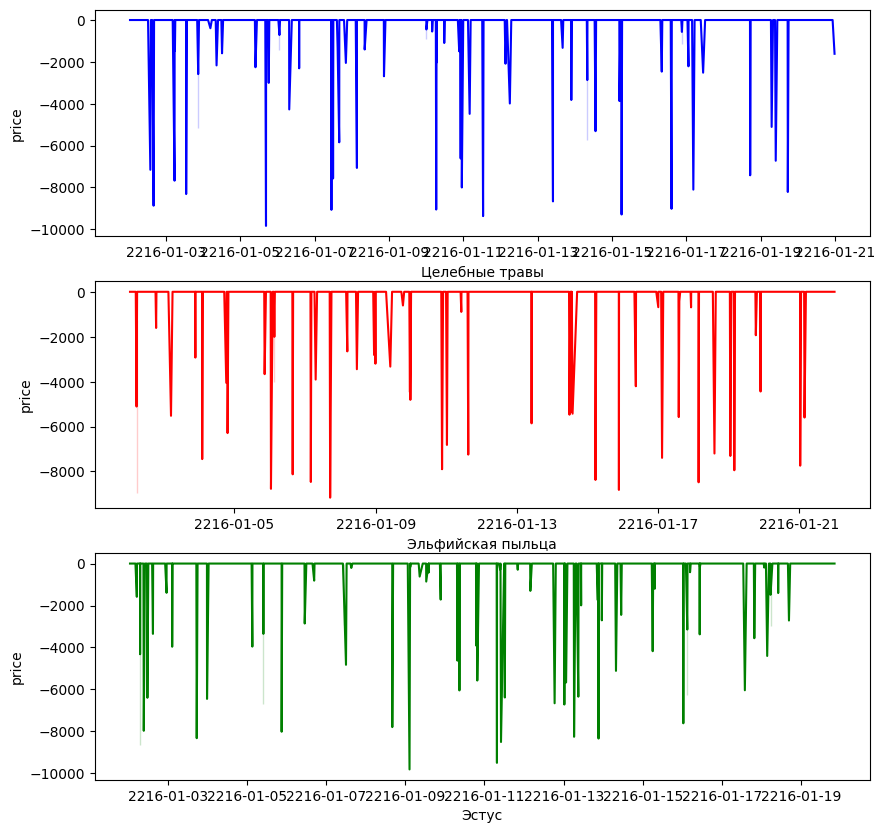

In [14]:
fig, ax = plt.subplots(3, 1, figsize=(10,10))
sns.lineplot(x='datetime', y='price', data=df_transaction[df_transaction['product'] == 'Целебные травы'].iloc[:1000], ax=ax[0], color='b')
sns.lineplot(x='datetime', y='price', data=df_transaction[df_transaction['product'] == 'Эльфийская пыльца'].iloc[:1000], ax=ax[1], color='r')
sns.lineplot(x='datetime', y='price', data=df_transaction[df_transaction['product'] == 'Эстус'].iloc[:1000], ax=ax[2], color='g')
ax[0].set_xlabel('Целебные травы')
ax[1].set_xlabel('Эльфийская пыльца')
ax[2].set_xlabel('Эстус')

Есть очень много выбросов. Уберём те транзакции, в которых:

1) Цена имеет значение <= 0

2) Количество проданного товара <= 0

In [15]:
df_transaction = df_transaction[df_transaction['price'] > 0]
df_transaction = df_transaction[df_transaction['amount'] > 0]
df_transaction.dropna(inplace=True)

In [16]:
print(df_transaction.describe())

               price         amount
count  655659.000000  655659.000000
mean       11.407969       0.987747
std         5.403327       0.576466
min         2.730000       0.000001
25%         7.490000       0.487804
50%        10.000000       0.982130
75%        14.140000       1.484279
max        31.200000       1.999999


После преобразований сводная статистика стала приемлемой, однако мы потеряли порядка 220.000 записей.

Посмотрим на график изменения цены товаров после внесённых изменений. Предварительно проверяем разницу в количестве проданного товара.

In [17]:
df_transaction['product'].value_counts()

Эстус                227984
Целебные травы       224756
Эльфийская пыльца    202919
Name: product, dtype: int64

Text(0.5, 0, 'Эстус')

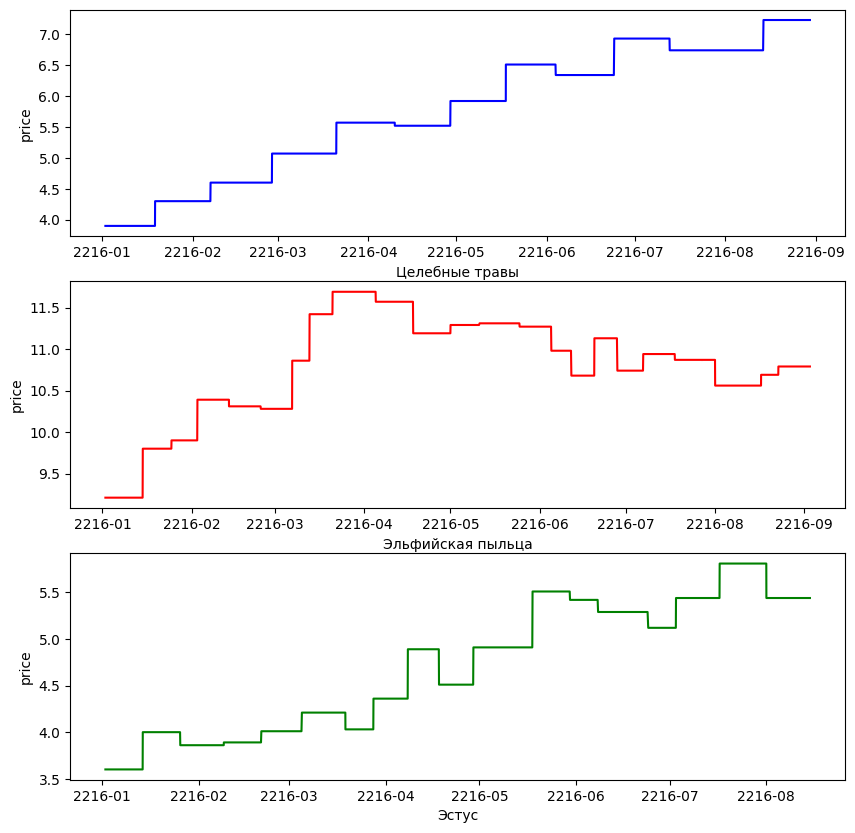

In [18]:
fig, ax = plt.subplots(3, 1, figsize=(10,10))
sns.lineplot(x='datetime', y='price', data=df_transaction[df_transaction['product'] == 'Целебные травы'].iloc[:10000], ax=ax[0], color='b')
sns.lineplot(x='datetime', y='price', data=df_transaction[df_transaction['product'] == 'Эльфийская пыльца'].iloc[:10000], ax=ax[1], color='r')
sns.lineplot(x='datetime', y='price', data=df_transaction[df_transaction['product'] == 'Эстус'].iloc[:10000], ax=ax[2], color='g')
ax[0].set_xlabel('Целебные травы')
ax[1].set_xlabel('Эльфийская пыльца')
ax[2].set_xlabel('Эстус')

После удаления аномальных записей график также пришёл в норму.

## 3) Таблица конкурентов

В данной таблице содержится информация о ценах на товары у конкурентов

In [19]:
df_competitors.head(10)

,place,product,competitor,price,date
0,Анор Лондо,Целебные травы,Арториас&Co,3.78,2216-01-04
1,Анор Лондо,Целебные травы,Арториас&Co,3.78,2216-01-05
2,Анор Лондо,Целебные травы,Арториас&Co,3.78,2216-01-06
3,Анор Лондо,Целебные травы,Арториас&Co,3.78,2216-01-09
5,Анор Лондо,Целебные травы,Арториас&Co,3.78,2216-01-11
6,Анор Лондо,Целебные травы,Арториас&Co,3.78,2216-01-12
7,Анор Лондо,Целебные травы,Арториас&Co,3.78,2216-01-13
9,Анор Лондо,Целебные травы,Арториас&Co,4.03,2216-01-17
10,Анор Лондо,Целебные травы,Арториас&Co,4.03,2216-01-18
12,Анор Лондо,Целебные травы,Арториас&Co,4.03,2216-01-21


In [20]:
df_competitors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31799 entries, 0 to 39456
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   place       31799 non-null  object        
 1   product     31799 non-null  object        
 2   competitor  31799 non-null  object        
 3   price       31799 non-null  float64       
 4   date        31799 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 1.5+ MB


In [21]:
df_competitors.isna().sum()

place         0
product       0
competitor    0
price         0
date          0
dtype: int64

In [22]:
df_competitors.describe()

,price
count,31799.000000
mean,11.894810
std,5.574935
min,2.850000
25%,7.780000
50%,11.050000
75%,15.030000
max,31.940000


Данные по столбцу 'price' в порядке, нет видимых изъян.

Посмотрим график цен на товары у конкурентов:

Text(0.5, 0, 'Эстус')

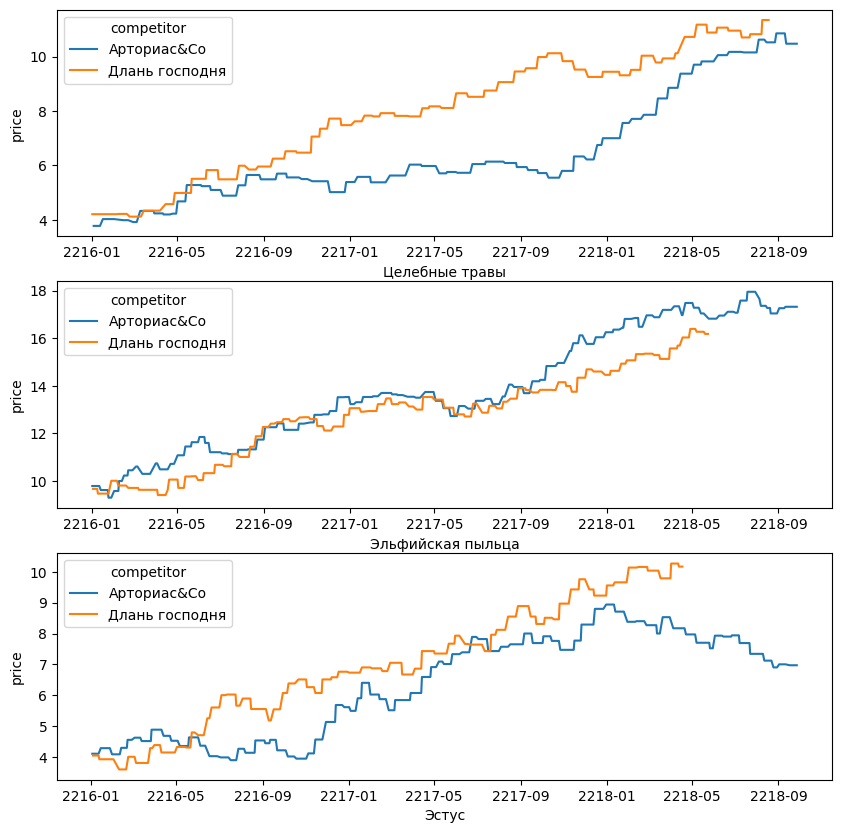

In [23]:
fig, ax = plt.subplots(3, 1, figsize=(10,10))
sns.lineplot(x='date', y='price', data=df_competitors[df_competitors['product'] == 'Целебные травы'].iloc[:1000], ax=ax[0], hue='competitor')
sns.lineplot(x='date', y='price', data=df_competitors[df_competitors['product'] == 'Эльфийская пыльца'].iloc[:1000], ax=ax[1],hue='competitor')
sns.lineplot(x='date', y='price', data=df_competitors[df_competitors['product'] == 'Эстус'].iloc[:1000], ax=ax[2],hue='competitor')
ax[0].set_xlabel('Целебные травы')
ax[1].set_xlabel('Эльфийская пыльца')
ax[2].set_xlabel('Эстус')

По данным графикам можем обратить внимание на отсутствие записей по товарам 'Эльфийская пыльца' и 'Эстус' у компании 'Длань господня' после 2218-05. В целом, компания 'Длань господня' имеет более высокие цены на товары 'Целебные травы' и 'Эстус'. По цене на 'Эльфийскую пыльцу' есть небольшие различия, с 2217-09 у компании 'Арториас&Co' цена на этот вид товара стала выше 'Длань господня'.

## 4) Таблица погоды

В данной таблице приведены сведения о погоде для каждого города по дням

In [24]:
df_weather.head(10)

,place,hot,rain,snow,date
0,Фалькония,0,0,0,2216-01-02
1,Анор Лондо,1,0,0,2216-01-02
2,Врата Балдура,0,0,1,2216-01-02
3,Нокрон,0,0,0,2216-01-02
4,Кеджистан,0,0,1,2216-01-02
5,Фалькония,0,0,1,2216-01-03
6,Анор Лондо,1,0,0,2216-01-03
7,Врата Балдура,0,0,1,2216-01-03
8,Нокрон,0,0,1,2216-01-03
9,Кеджистан,0,0,0,2216-01-03


In [25]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   place   5000 non-null   object        
 1   hot     5000 non-null   int64         
 2   rain    5000 non-null   int64         
 3   snow    5000 non-null   int64         
 4   date    5000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 195.4+ KB


Нет пропущенных значений

In [26]:
df_weather.describe()

,hot,rain,snow
count,5000.000000,5000.000000,5000.000000
mean,0.175200,0.172600,0.167200
std,0.380176,0.377939,0.373192
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000


Видимых выбросов также нет.

Добавим погоду к транзакциям, чтобы проверить влияние погодных условий на продажу товаров.

In [27]:
df_transaction['date'] = pd.to_datetime(df_transaction['datetime'].dt.date)

In [28]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 655659 entries, 0 to 875035
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   product   655659 non-null  object        
 1   price     655659 non-null  float64       
 2   amount    655659 non-null  float64       
 3   place     655659 non-null  object        
 4   datetime  655659 non-null  datetime64[ns]
 5   date      655659 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), object(2)
memory usage: 35.0+ MB


In [29]:
df_transaction_weather = df_transaction.merge(df_weather, on=['place', 'date']).drop(columns='date')

In [30]:
df_transaction_weather

,product,price,amount,place,datetime,hot,rain,snow
0,Целебные травы,3.90,1.242125,Анор Лондо,2216-01-02 16:28:00,1,0,0
1,Целебные травы,3.90,0.882450,Анор Лондо,2216-01-02 03:03:00,1,0,0
2,Целебные травы,3.90,0.621377,Анор Лондо,2216-01-02 03:12:00,1,0,0
3,Целебные травы,3.90,1.367161,Анор Лондо,2216-01-02 05:33:00,1,0,0
4,Целебные травы,3.90,1.736619,Анор Лондо,2216-01-02 11:54:00,1,0,0
...,...,...,...,...,...,...,...,...
655654,Эстус,9.28,1.079104,Фалькония,2218-09-27 14:50:00,0,0,0
655655,Эстус,9.28,1.580617,Фалькония,2218-09-27 06:16:00,0,0,0
655656,Эстус,9.28,1.738492,Фалькония,2218-09-27 11:14:00,0,0,0
655657,Эстус,9.28,0.430340,Фалькония,2218-09-27 22:24:00,0,0,0


Посмотрим как погода влияет на продажу определённых типов товаров.

Text(0.5, 0, 'snow')

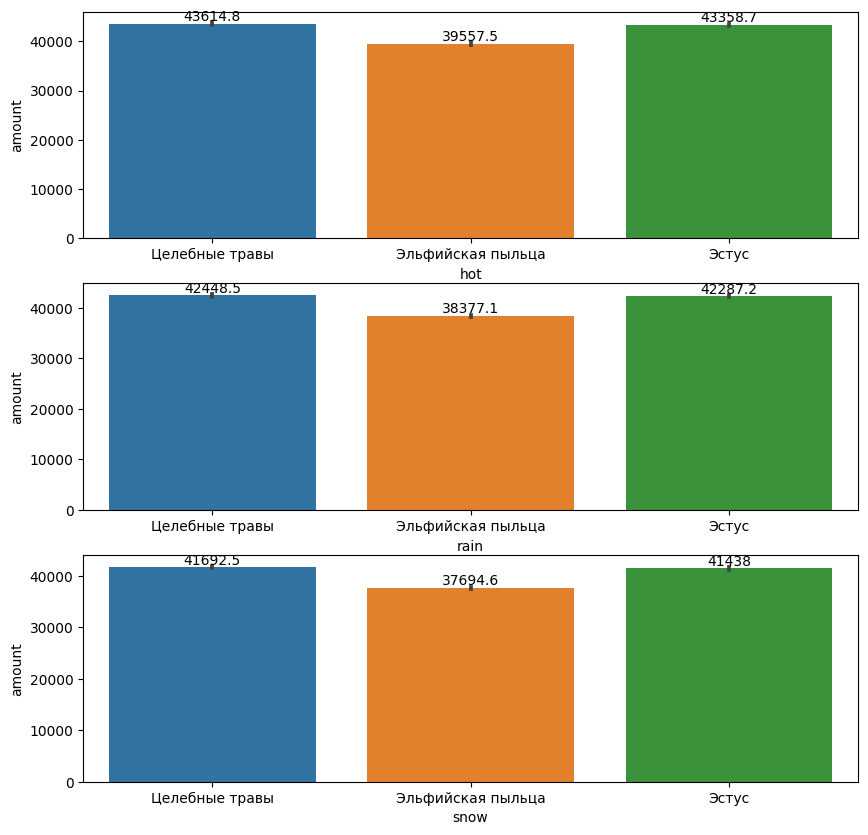

In [31]:
fig, ax = plt.subplots(3, 1, figsize=(10,10))
sns.barplot(data=df_transaction_weather[df_transaction_weather['hot']==1], x='product', y='amount', estimator="sum", ax=ax[0])
sns.barplot(data=df_transaction_weather[df_transaction_weather['rain']==1], x='product', y='amount', estimator="sum", ax=ax[1])
sns.barplot(data=df_transaction_weather[df_transaction_weather['snow']==1], x='product', y='amount', estimator="sum", ax=ax[2])
ax[0].bar_label(ax[0].containers[0], fontsize=10)
ax[1].bar_label(ax[1].containers[0], fontsize=10)
ax[2].bar_label(ax[2].containers[0], fontsize=10)
ax[0].set_xlabel('hot')
ax[1].set_xlabel('rain')
ax[2].set_xlabel('snow')

Значимой зависимости в продаже товаров от погодных условий не наблюдается. Будь то жара, дождь или снег - количество проданных товаров примерно одинаково распределено по категориям товаров. 'Эльфийской пыльцы' всегда продаётся меньше, 'Целебных трав' и 'Эстуса' примерно поровну.

Посмотрим на таблицу корреляций столбцов, для этого закодируем столбец 'place'.

In [32]:
df_transaction_weather_code = pd.get_dummies(df_transaction_weather, columns=['place'])

In [33]:
df_transaction_weather_code

,product,price,amount,datetime,hot,rain,snow,place_Анор Лондо,place_Врата Балдура,place_Кеджистан,place_Нокрон,place_Фалькония
0,Целебные травы,3.90,1.242125,2216-01-02 16:28:00,1,0,0,1,0,0,0,0
1,Целебные травы,3.90,0.882450,2216-01-02 03:03:00,1,0,0,1,0,0,0,0
2,Целебные травы,3.90,0.621377,2216-01-02 03:12:00,1,0,0,1,0,0,0,0
3,Целебные травы,3.90,1.367161,2216-01-02 05:33:00,1,0,0,1,0,0,0,0
4,Целебные травы,3.90,1.736619,2216-01-02 11:54:00,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
655654,Эстус,9.28,1.079104,2218-09-27 14:50:00,0,0,0,0,0,0,0,1
655655,Эстус,9.28,1.580617,2218-09-27 06:16:00,0,0,0,0,0,0,0,1
655656,Эстус,9.28,1.738492,2218-09-27 11:14:00,0,0,0,0,0,0,0,1
655657,Эстус,9.28,0.430340,2218-09-27 22:24:00,0,0,0,0,0,0,0,1


<ipython-input-34-4acf586f9d74>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_transaction_weather_code.corr(method='spearman'), annot=True)


<Axes: >

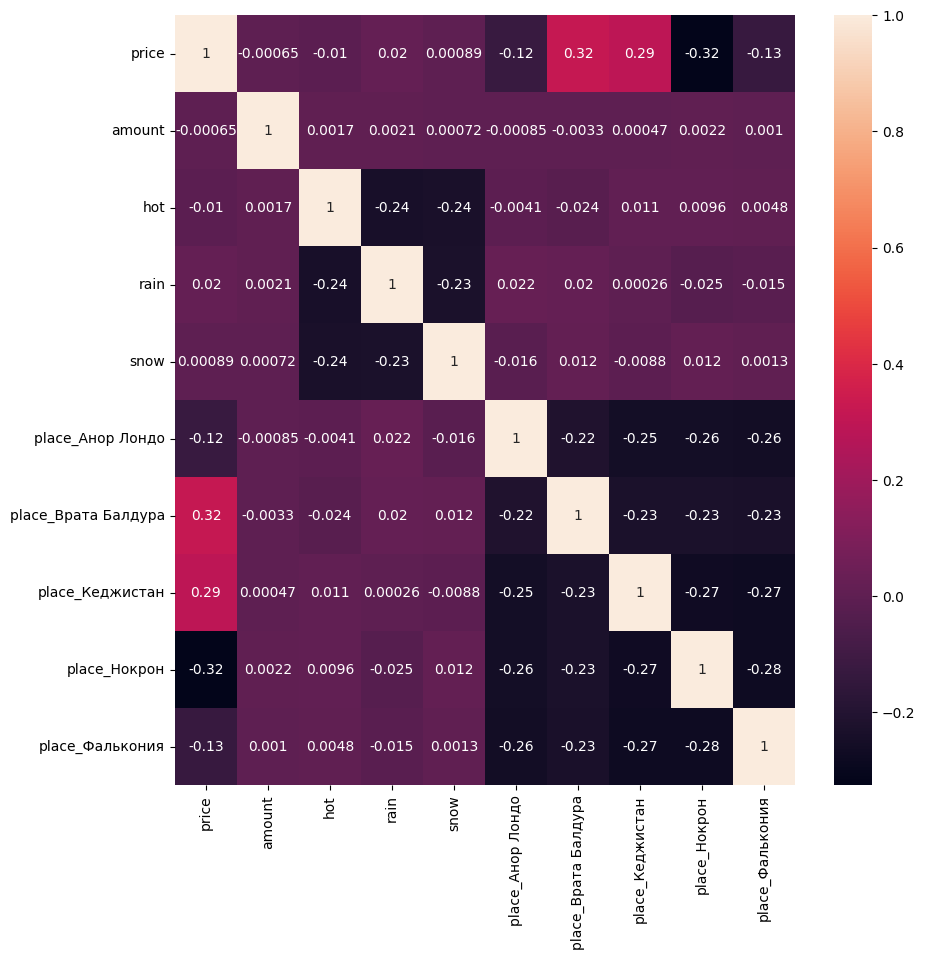

In [34]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(df_transaction_weather_code.corr(method='spearman'), annot=True)

Видим, что есть некая зависимость(хоть и умеренная) между ценой и местом. Скорее всего, это связано со себестоимостью продукции в городах, посмотрим на это.

In [35]:
df_cost['week'] = df_cost['date'].dt.isocalendar().week
df_cost['year'] = df_cost['date'].dt.year
df_cost['week'] = df_cost['date'].dt.strftime('%W').astype('uint8')

In [36]:
def draw_cost(product, n):
  sns.lineplot(data=df_cost[df_cost['product']==product],
        x='week', y='cost', hue='place', ci=None, palette='tab10', ax=ax[n])
  ax[n].set_title('Себестоимость товара: ' + product)
  ax[n].legend(loc='upper center', ncol=5)
  ax[n].set_xlim(0, 52)
  ax[n].set_ylabel('Стоимость')
  ax[n].set_xlabel('')

<ipython-input-36-5e0f003b123f>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_cost[df_cost['product']==product],
<ipython-input-36-5e0f003b123f>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_cost[df_cost['product']==product],
<ipython-input-36-5e0f003b123f>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_cost[df_cost['product']==product],


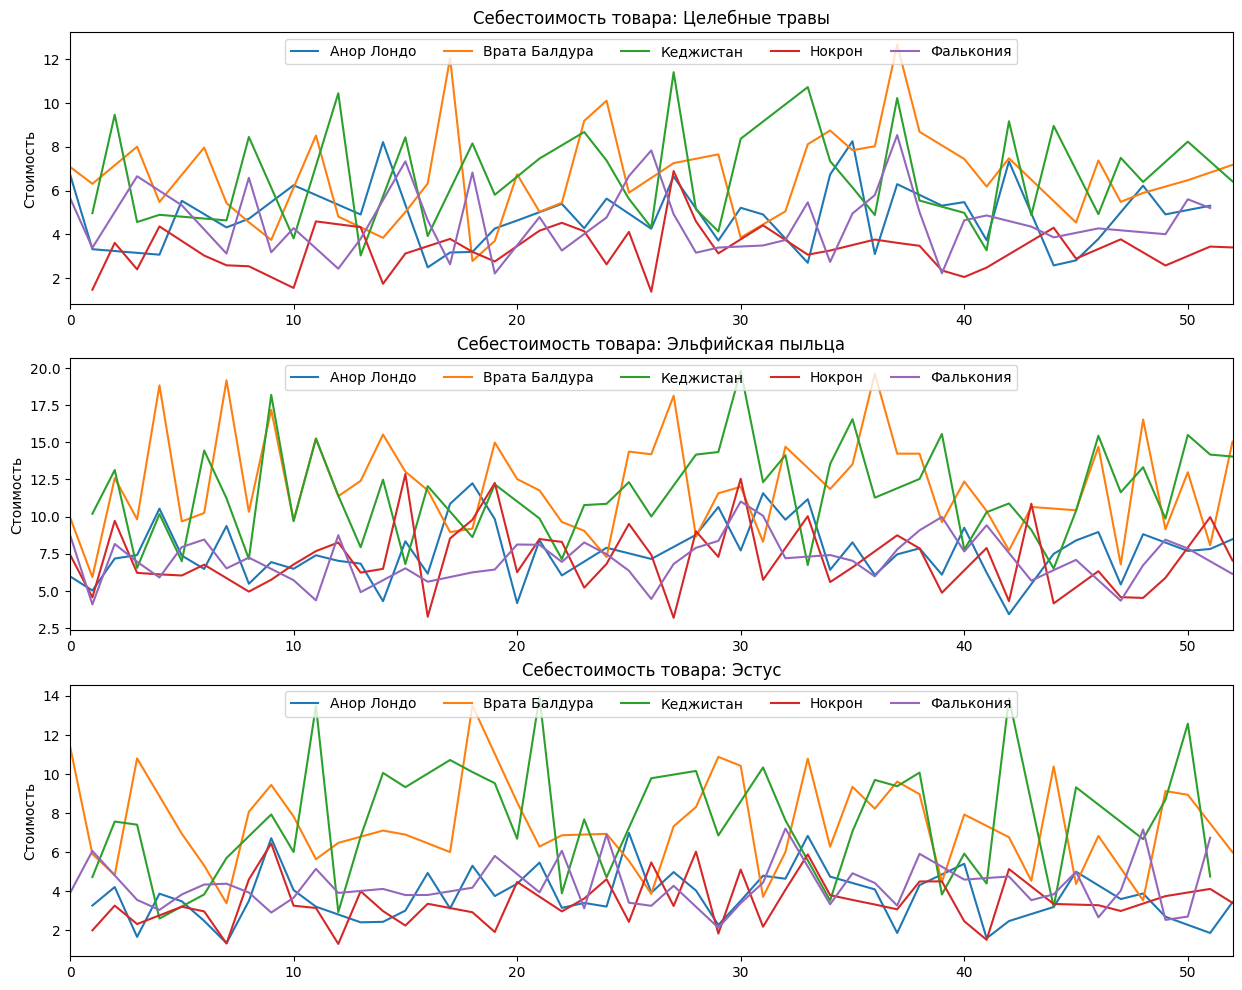

In [37]:
fig, ax = plt.subplots(3, 1, figsize=(15, 12))
draw_cost('Целебные травы', 0)
draw_cost('Эльфийская пыльца', 1)
draw_cost('Эстус', 2)


Действительно, можно заметить, что себестоимость зависит от города, а следовательно, и конечная цена зависит от места продажи.

# 3.Построение прогнозов

Для начала мы построим прогноз по себестоимости товара(cost), для этого нам необходимо рассмотреть все пары: Город-Товар.
Затем мы спрогнозируем цену на товары(price) рассматривая пары Город-Товар. А после, мы сможем оценить ожидаемую прибыль.

## 1.Себестоимость

Определим период изменения стоимости

In [38]:
# среднее количество записей по городам
mean_val = df_cost['place'].value_counts().mean()
print(mean_val)
row_per_product = mean_val // 3 # 3 - количество товаров в каждом городе
print(row_per_product)

223.4
74.0


Так как записи представлены за период с 2216-01 по 2218-10(почти), то этот период содержит в себе 34 месяца.

In [39]:
mean_change_cost = row_per_product // 34
print(mean_change_cost)

2.0


Исходя из данных, обычно, себестоимость продукции меняется 2 раза в месяц, т.к. нам необходимо предсказать прибыль на период 90 дней (3 мес.), то спрогнозируем следующие 6 значений стоимости.

In [40]:
# функция для построения прогноза себестоимости для пары Город-Товар на основе ARIMA

def predict_cost(prod, place, p=10, d=2, q=3):
  loc_data_cost = df_cost[(df_cost['product']==prod) & (df_cost['place'] == place)][['cost']]
  loc_data_cost = loc_data_cost.set_index(np.arange(0, len(loc_data_cost)))
  result = adfuller(loc_data_cost['cost'])
  print('ADF Statistic: %f' % result[0])
  print('p-value: %f' % result[1])

  # модель
  model = ARIMA(loc_data_cost['cost'], order=(p,d,q))
  model_fit = model.fit()

  # прогнозирование стоимости
  arima_pred_cost = model_fit.predict(start = len(loc_data_cost), end = len(loc_data_cost)+5, typ="levels")

  # Построение графика
  fig, ax = plt.subplots(figsize=(8,6))
  loc_data_cost.plot(ax=ax)
  arima_pred_cost.plot(ax=ax, legend='predicted')
  plt.legend()
  plt.show()
  return arima_pred_cost

### 1.1 Анор Лондо - Целебные травы

ADF Statistic: -0.236756
p-value: 0.933996


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


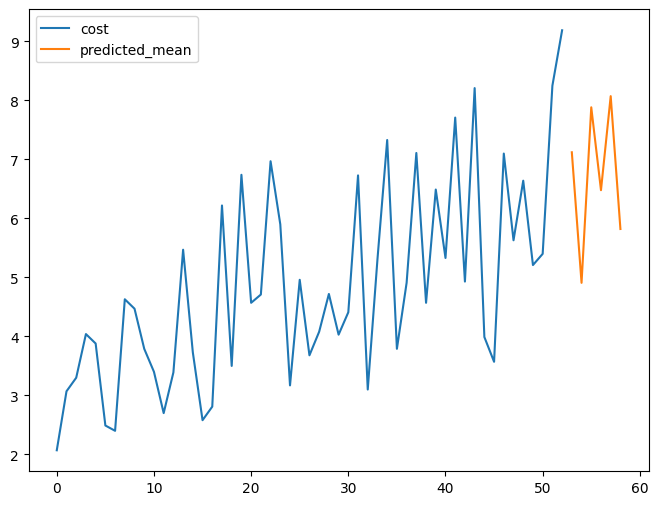

In [41]:
predict_cost_an_ct = predict_cost('Целебные травы', 'Анор Лондо')

### 1.2 Анор Лондо - Эстус

ADF Statistic: -0.468642
p-value: 0.897992


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


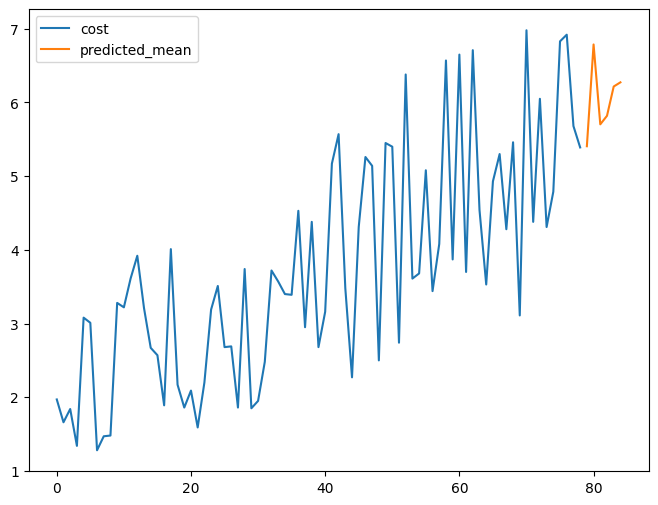

In [42]:
predict_cost_an_est = predict_cost('Эстус', 'Анор Лондо')

### 1.3 Анор Лондо - Эльфийская пыльца

ADF Statistic: -2.040085
p-value: 0.269278


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


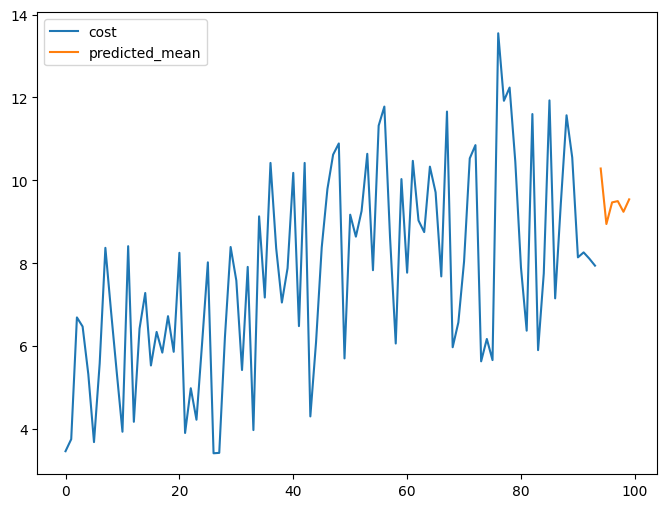

In [43]:
predict_cost_an_elp = predict_cost('Эльфийская пыльца', 'Анор Лондо')

### 1.4 Фалькония - Целебные травы

ADF Statistic: -0.841440
p-value: 0.806645


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


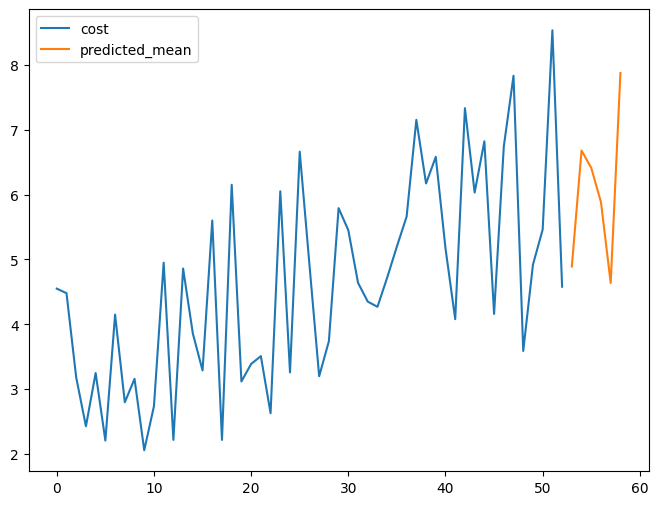

In [44]:
predict_cost_falc_ct = predict_cost('Целебные травы', 'Фалькония')

### 1.5 Фалькония - Эстус

ADF Statistic: -5.618187
p-value: 0.000001


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


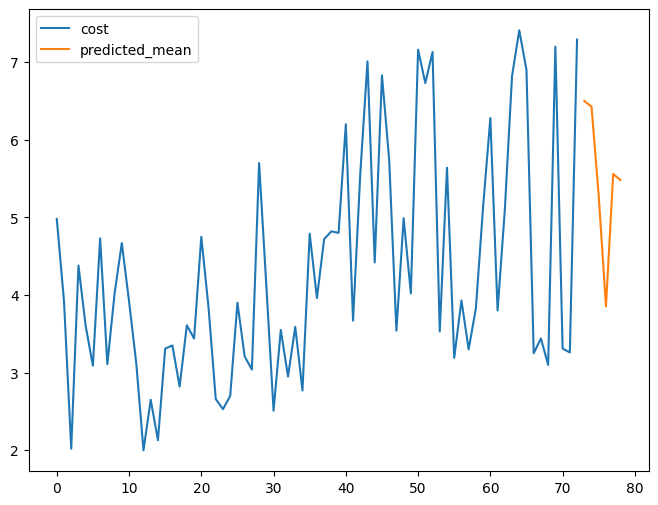

In [45]:
predict_cost_falc_est = predict_cost('Эстус', 'Фалькония')

### 1.6 Фалькония - Эльфийская пыльца

ADF Statistic: -3.708503
p-value: 0.003995


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


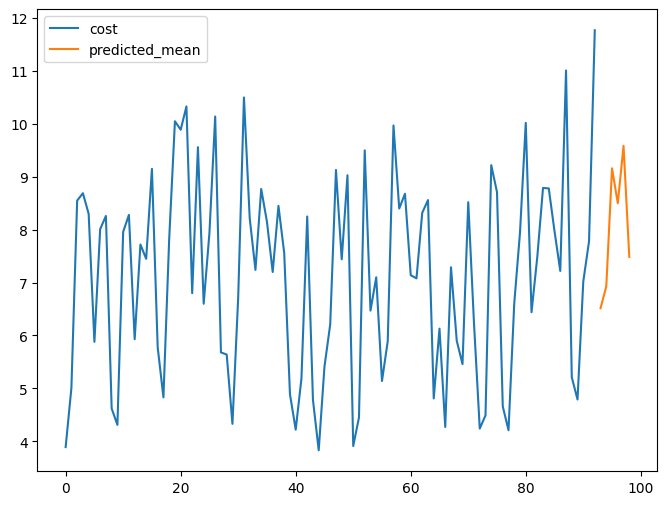

In [46]:
predict_cost_falc_elp = predict_cost('Эльфийская пыльца', 'Фалькония')

### 1.7 Врата Балдура - Целебные травы

ADF Statistic: -3.520223
p-value: 0.007483


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


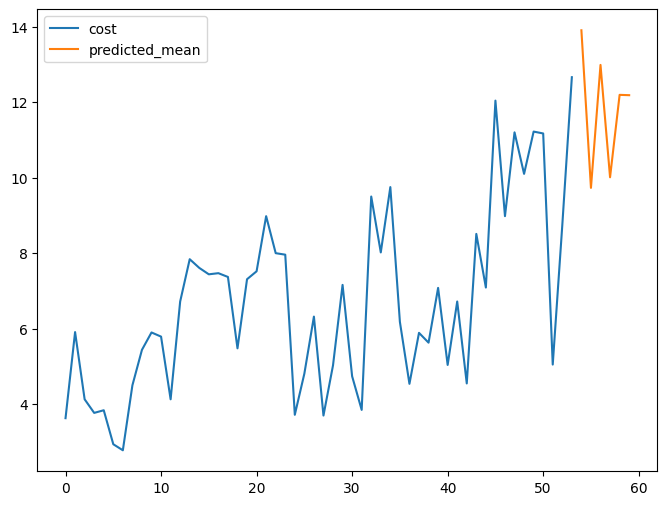

In [47]:
predict_cost_vrba_ct = predict_cost('Целебные травы', 'Врата Балдура')

### 1.8 Врата Балдура - Эстус

ADF Statistic: -0.976086
p-value: 0.761886


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


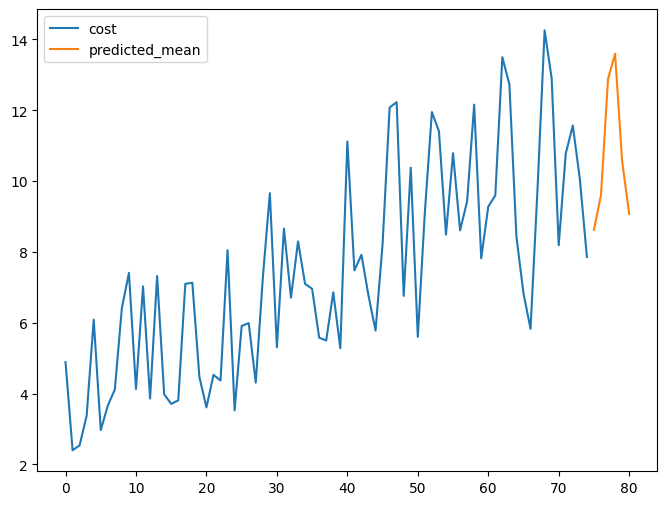

In [48]:
predict_cost_vrba_est = predict_cost('Эстус', 'Врата Балдура')

### 1.9 Врата Балдура - Эльфийская пыльца

ADF Statistic: -5.572167
p-value: 0.000001


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


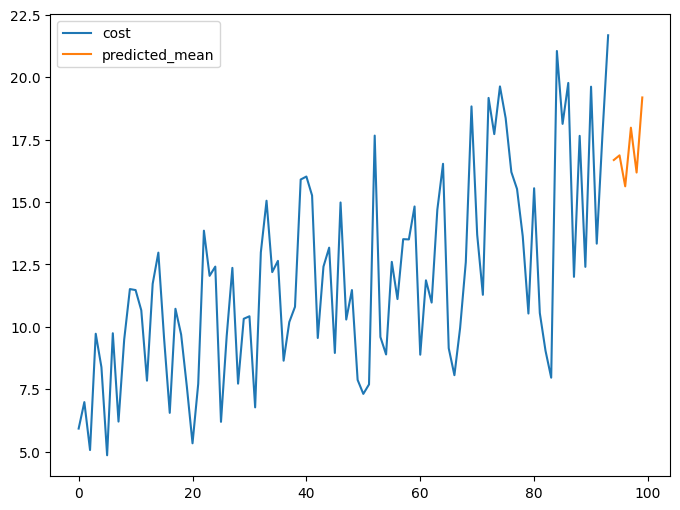

In [49]:
predict_cost_vrba_elp = predict_cost('Эльфийская пыльца', 'Врата Балдура')

### 1.10 Нокрон - Целебные травы

ADF Statistic: -0.689913
p-value: 0.849345


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


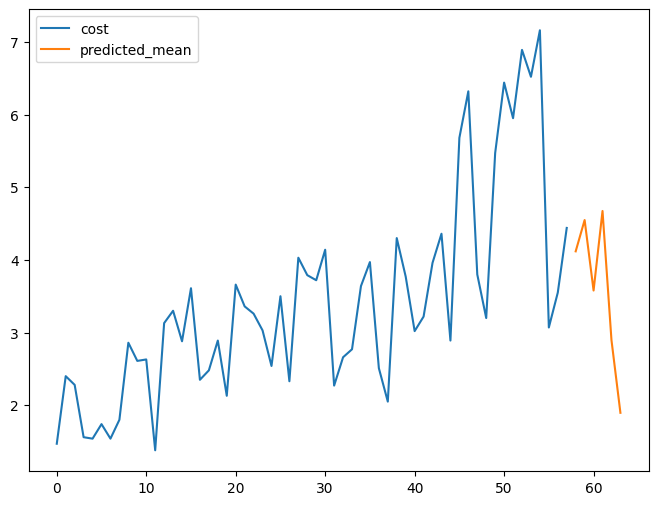

In [50]:
predict_cost_nok_ct = predict_cost('Целебные травы', 'Нокрон')

### 1.11 Нокрон - Эстус

ADF Statistic: -0.897870
p-value: 0.788673


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


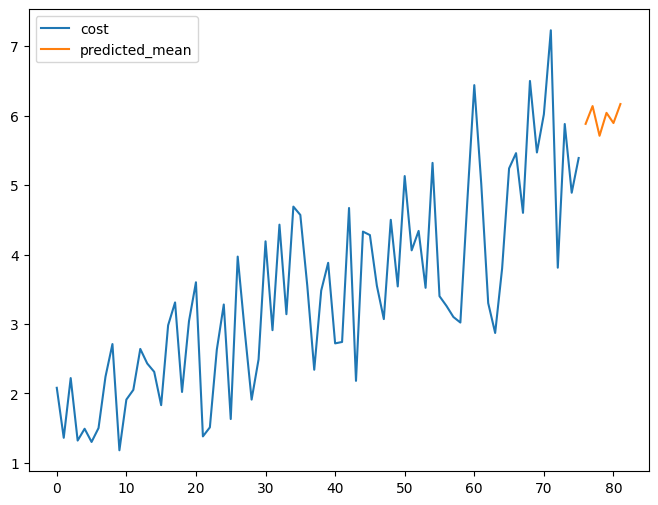

In [51]:
predict_cost_nok_est = predict_cost('Эстус', 'Нокрон')

### 1.12 Нокрон - Эльфийская пыльца

ADF Statistic: -2.182658
p-value: 0.212600


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


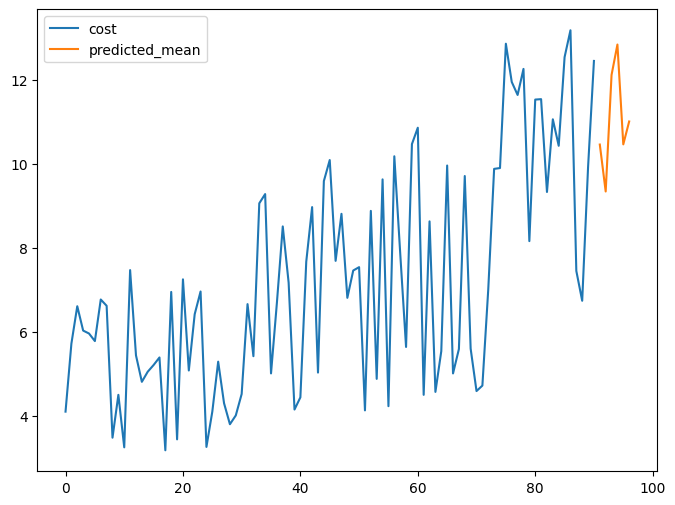

In [52]:
predict_cost_nok_elp = predict_cost('Эльфийская пыльца', 'Нокрон')

### 1.13 Кеджистан - Целебные травы

ADF Statistic: 1.238774
p-value: 0.996243


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


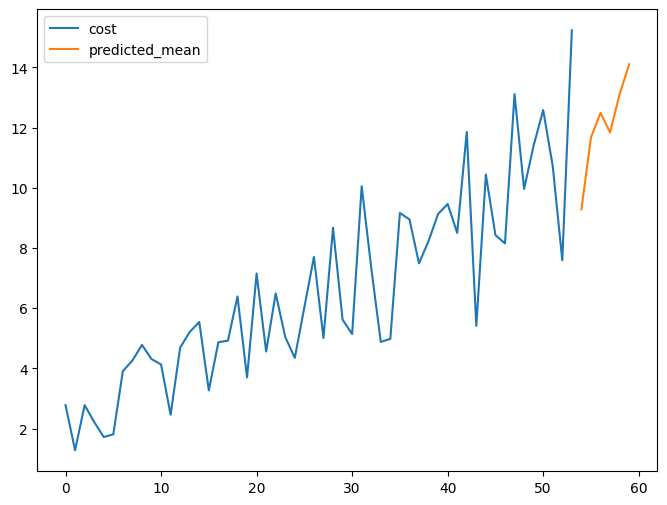

In [53]:
predict_cost_kej_ct = predict_cost('Целебные травы', 'Кеджистан')

### 1.14 Кеджистан - Эстус

ADF Statistic: -1.410648
p-value: 0.577161


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


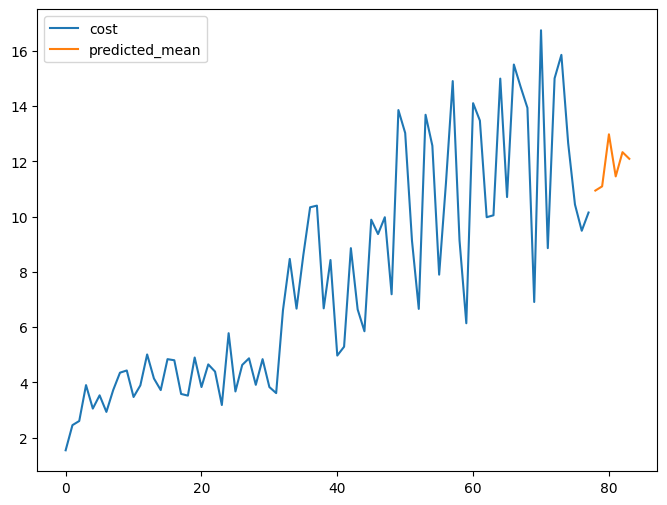

In [54]:
predict_cost_kej_est = predict_cost('Эстус', 'Кеджистан')

### 1.15 Кеджистан - Эльфийская пыльца

ADF Statistic: -1.500609
p-value: 0.533210


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


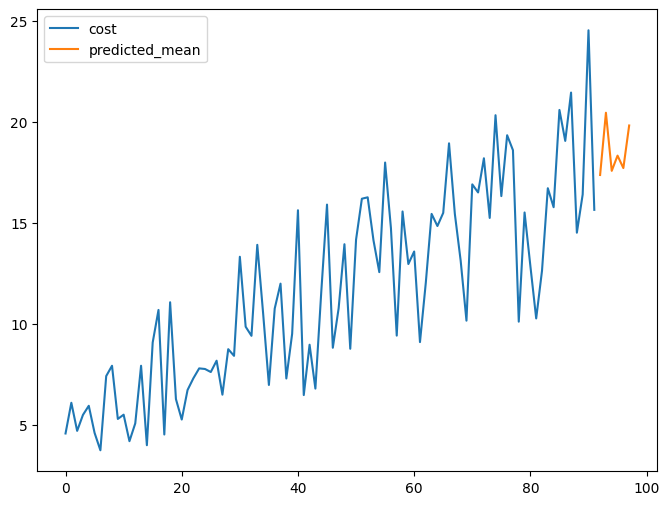

In [55]:
predict_cost_kej_elp = predict_cost('Эльфийская пыльца', 'Кеджистан')

## 2.Цены товаров

Теперь построим прогнозы по цене товара на период 90 дней, будем также рассматривать все пары: Город-Товар

In [56]:
def predict_price(prod, place, p=10, d=2, q=3):
  loc_data_price = df_transaction_weather[(df_transaction_weather['product']==prod) & (df_transaction_weather['place'] == place)][['price', 'datetime']]
  loc_data_price['date'] = pd.to_datetime(loc_data_price['datetime'].dt.date)
  loc_data_price.drop(columns=['datetime'], inplace=True)
  loc_data_price.drop_duplicates(inplace=True) # убираем одинаковые записи(транзакции) и оставляем одно значение в один день
  loc_data_price = loc_data_price.set_index(np.arange(0, len(loc_data_price)))
  loc_data_price.drop(columns=['date'], inplace=True)
  result = adfuller(loc_data_price['price'])
  print('ADF Statistic: %f' % result[0])
  print('p-value: %f' % result[1])
  model = ARIMA(loc_data_price['price'], order=(10,2,3))
  model_fit = model.fit()
  # прогнозирование цен
  arima_pred = model_fit.predict(start = len(loc_data_price), end = len(loc_data_price)+90, typ="levels")
  # новый датафрейм, в котором цены меняются только с заданным периодом, в данном случае было выбрано значение 15
  new_val = []
  for i in range(0, len(arima_pred.values)-14, 15):
    for j in range(15):
      new_val.append(arima_pred.values[i])
  final_pred = pd.DataFrame(new_val, columns=['predicted_price'])
  final_pred = final_pred.set_index(np.arange(len(loc_data_price), len(loc_data_price)+90))

  # Построение графика
  fig, ax = plt.subplots(figsize=(8,6))
  loc_data_price.plot(ax=ax)
  final_pred.plot(ax=ax, legend='predicted')
  plt.legend()
  plt.show()
  return final_pred

### 2.1 Анор Лондо - Целебные травы

ADF Statistic: -0.512800
p-value: 0.889494


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


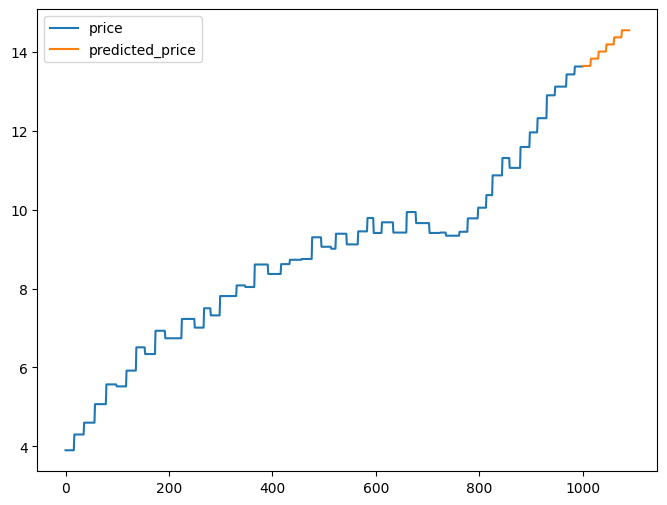

In [57]:
predict_price_an_ct = predict_price('Целебные травы', 'Анор Лондо')

### 2.2 Анор Лондо - Эстус

ADF Statistic: -0.352616
p-value: 0.917715


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


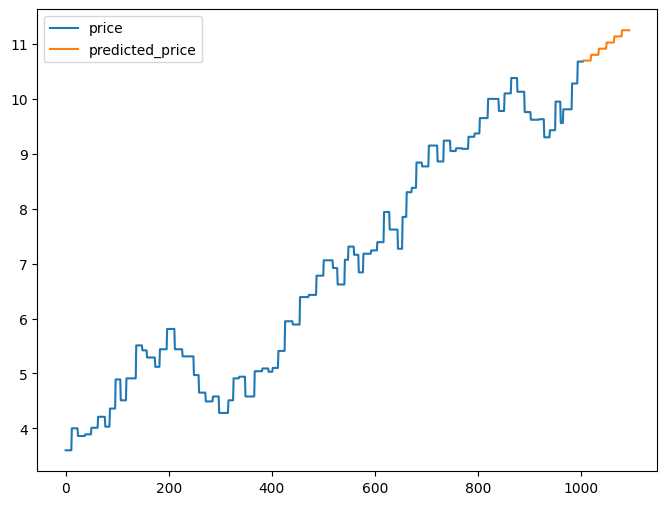

In [58]:
predict_price_an_est = predict_price('Эстус', 'Анор Лондо')

### 2.3 Анор Лондо - Эльфийская пыльца

ADF Statistic: -0.923683
p-value: 0.780073


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


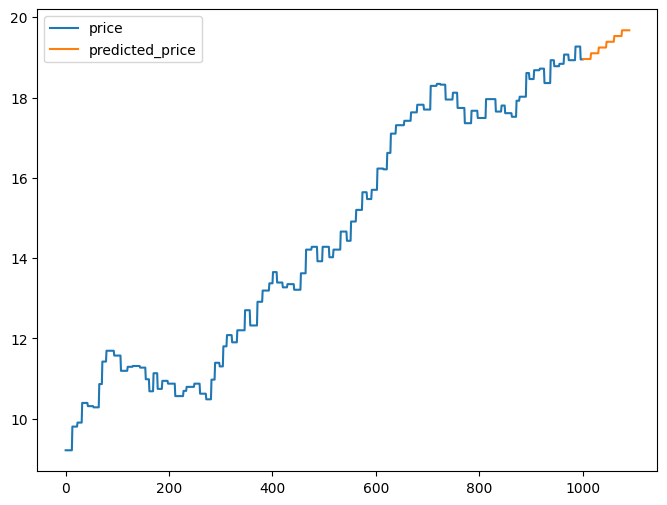

In [59]:
predict_price_an_elp = predict_price('Эльфийская пыльца', 'Анор Лондо')

### 2.4 Фалькония - Целебные травы

ADF Statistic: 0.375158
p-value: 0.980542


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


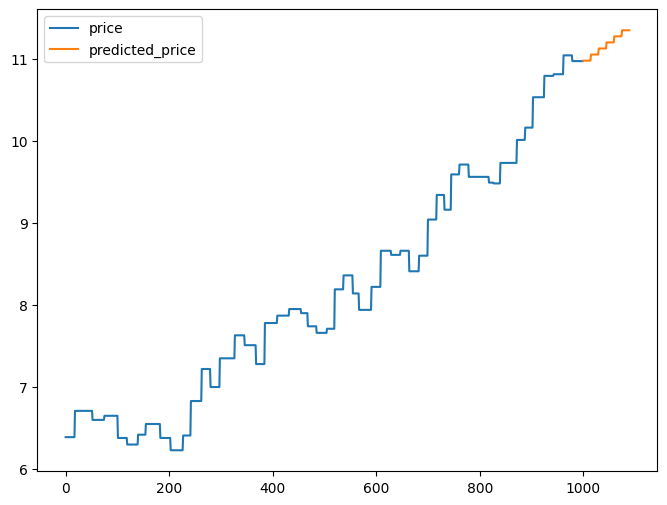

In [60]:
predict_price_falc_ct = predict_price('Целебные травы', 'Фалькония')

### 2.5 Фалькония - Эстус

ADF Statistic: -1.399958
p-value: 0.582296


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


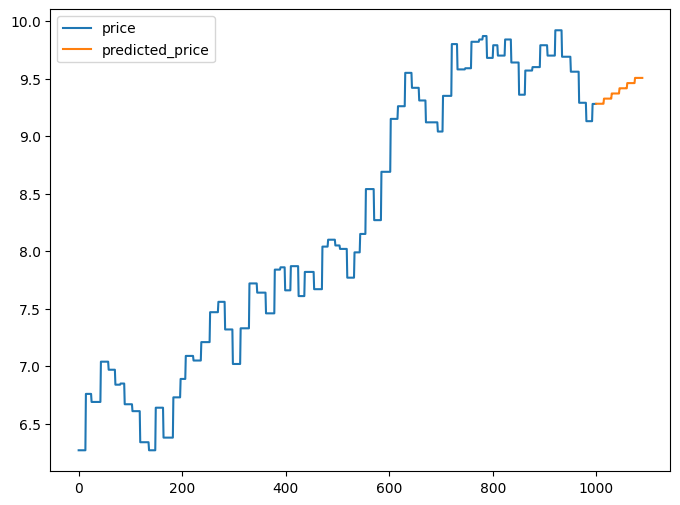

In [61]:
predict_price_falc_est = predict_price('Эстус', 'Фалькония')

### 2.6 Фалькония - Эльфийская пыльца

ADF Statistic: -0.292904
p-value: 0.926503


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


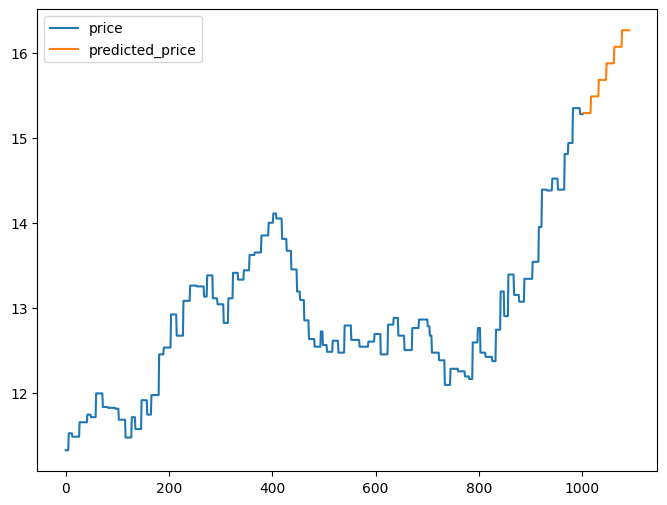

In [62]:
predict_price_falc_elp = predict_price('Эльфийская пыльца', 'Фалькония')

### 2.7 Врата Балдура - Целебные травы

ADF Statistic: -0.734039
p-value: 0.837735


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


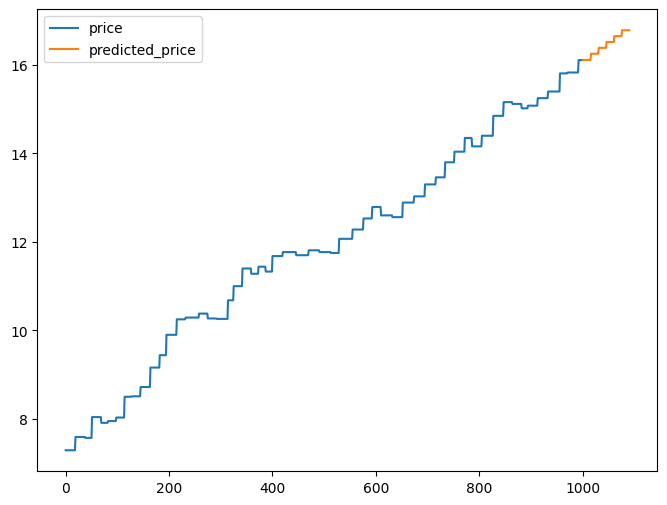

In [63]:
predict_price_vrba_ct = predict_price('Целебные травы', 'Врата Балдура')

### 2.8 Врата Балдура - Эстус

ADF Statistic: 0.245878
p-value: 0.974720


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


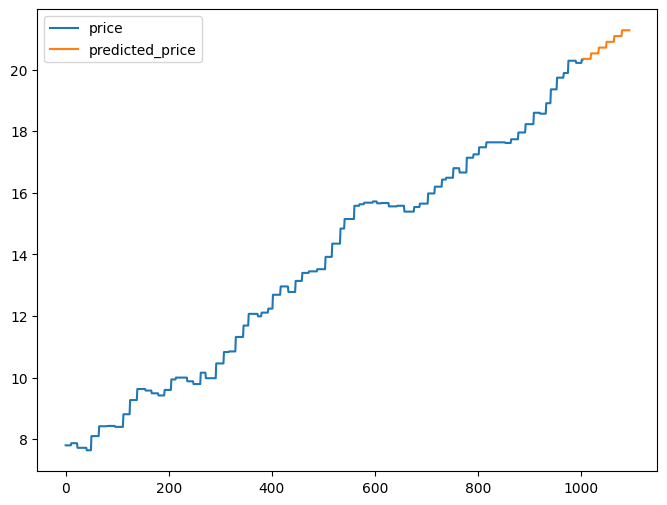

In [64]:
predict_price_vrba_est = predict_price('Эстус', 'Врата Балдура')

### 2.9 Врата Балдура - Эльфийская пыльца

ADF Statistic: -1.432799
p-value: 0.566455


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


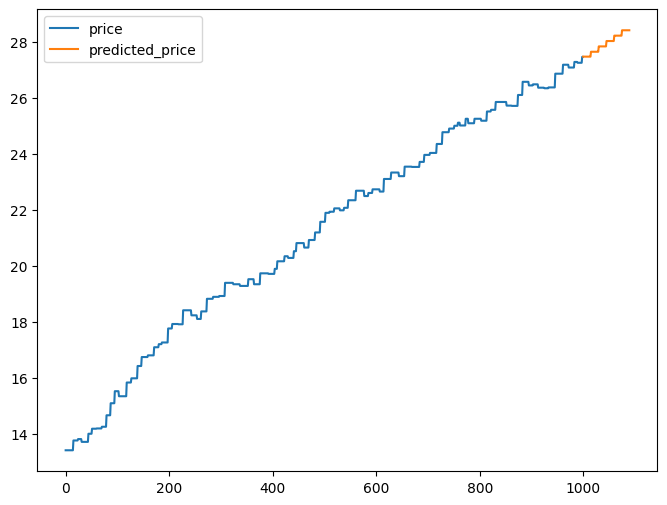

In [65]:
predict_price_vrba_elp = predict_price('Эльфийская пыльца', 'Врата Балдура')

### 2.10 Нокрон - Целебные травы

ADF Statistic: 0.307454
p-value: 0.977684


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


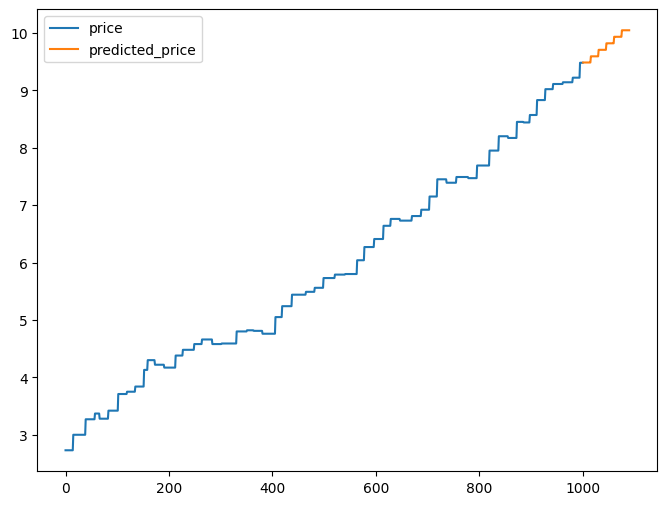

In [66]:
predict_price_nok_ct = predict_price('Целебные травы', 'Нокрон')

### 2.11 Нокрон - Эстус

ADF Statistic: -0.147874
p-value: 0.944456


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


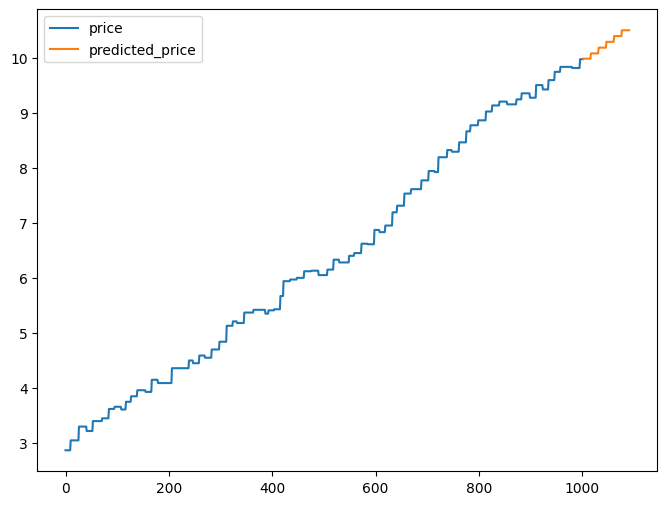

In [67]:
predict_price_nok_est = predict_price('Эстус', 'Нокрон')

### 2.12 Нокрон - Эльфийская пыльца

ADF Statistic: 1.214041
p-value: 0.996081


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


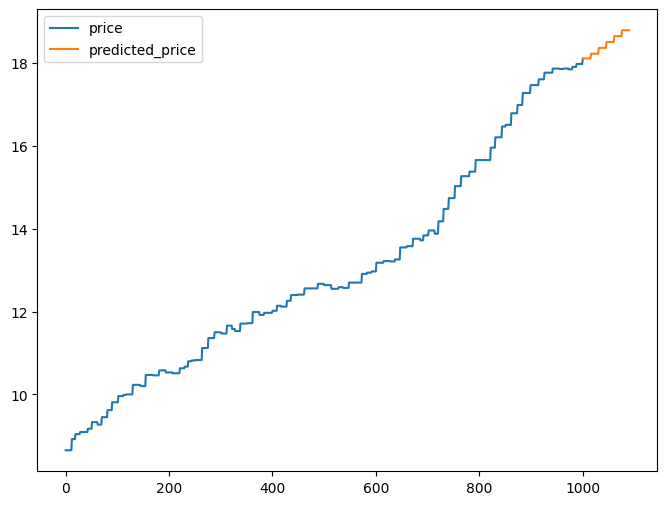

In [68]:
predict_price_nok_elp = predict_price('Эльфийская пыльца', 'Нокрон')

### 2.13 Кеджистан - Целебные травы

ADF Statistic: 0.578395
p-value: 0.987071


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


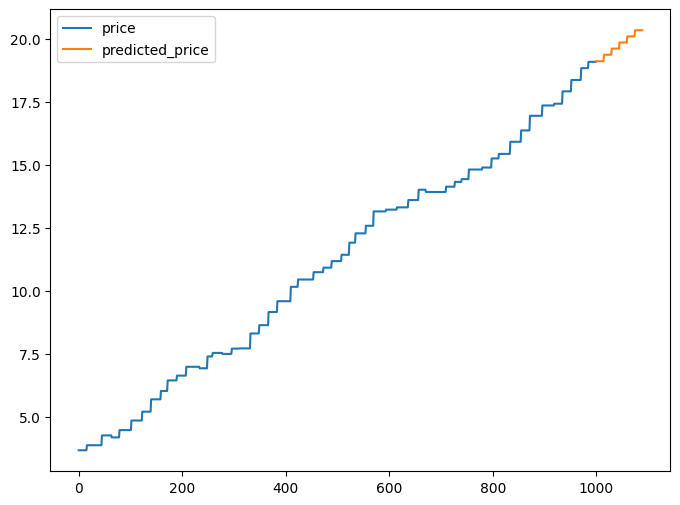

In [69]:
predict_price_kej_ct = predict_price('Целебные травы', 'Кеджистан')

### 2.14 Кеджистан - Эстус

ADF Statistic: 0.087925
p-value: 0.965227


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


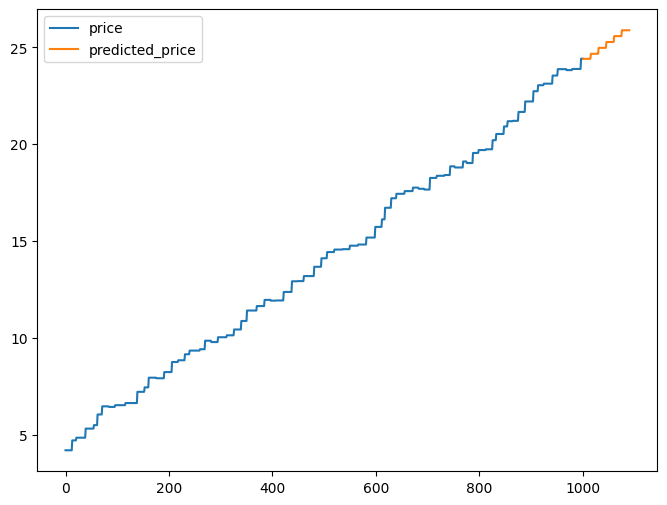

In [70]:
predict_price_kej_est = predict_price('Эстус', 'Кеджистан')

### 2.15 Кеджистан - Эльфийская пыльца

ADF Statistic: -0.549782
p-value: 0.881930


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


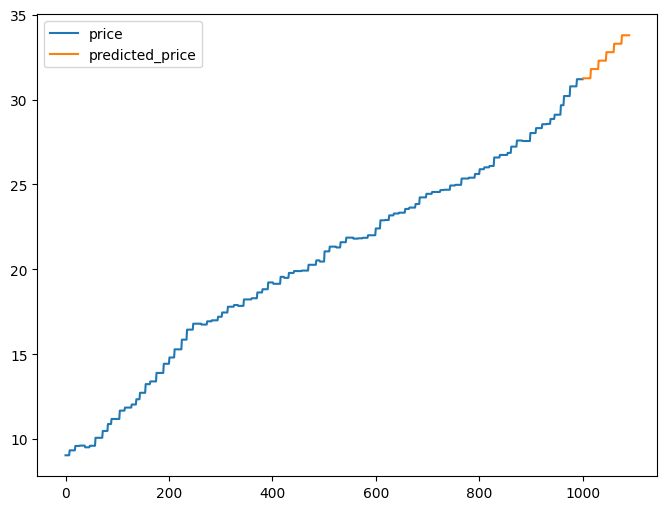

In [71]:
predict_price_kej_elp = predict_price('Эльфийская пыльца', 'Кеджистан')

# 4.Датафрейм прогноза

После того, как мы построили прогнозы по всем парам Город-Товар, создадим результирующий датафрейм со всеми полученными записями.

In [72]:
price_list = [predict_price_an_ct, predict_price_an_est, predict_price_an_elp,
              predict_price_vrba_ct, predict_price_vrba_est, predict_price_vrba_elp,
              predict_price_kej_ct, predict_price_kej_est, predict_price_kej_elp,
              predict_price_nok_ct, predict_price_nok_est, predict_price_nok_elp,
              predict_price_falc_ct, predict_price_falc_est, predict_price_falc_elp]
place_list = ['Анор Лондо', 'Врата Балдура', 'Кеджистан', 'Нокрон', 'Фалькония']
product_list = ['Целебные травы','Эстус','Эльфийская пыльца']

In [73]:
df_predict_price = []
i = 0
for place in place_list:
  for product in product_list:
    temp_df = pd.DataFrame(range(1, 91), columns=["day_num"])
    temp_df["place"] = place
    temp_df["product"] = product

    temp_df["price"] = price_list[i].values

    i += 1
    df_predict_price.append(temp_df)

df_predict_price = pd.concat(df_predict_price)
df_predict_price['price'] = df_predict_price['price'].apply(lambda x: round(x, 2))

In [74]:
df_predict_price

,day_num,place,product,price
0,1,Анор Лондо,Целебные травы,13.64
1,2,Анор Лондо,Целебные травы,13.64
2,3,Анор Лондо,Целебные травы,13.64
3,4,Анор Лондо,Целебные травы,13.64
4,5,Анор Лондо,Целебные травы,13.64
...,...,...,...,...
85,86,Фалькония,Эльфийская пыльца,16.27
86,87,Фалькония,Эльфийская пыльца,16.27
87,88,Фалькония,Эльфийская пыльца,16.27
88,89,Фалькония,Эльфийская пыльца,16.27


In [75]:
df_predict_price.to_parquet("df_predict_price.parquet")

# 5.Прибыль

Прибыль считается по формуле:
profit = price\*amount - cost\*amount.
Отсюда видим, что amount на самом деле можно принять за некую константу(или спрогнозировать), т.к. на отношение прибылей: полученной по нашей модели и baseline это не повлияет. Т.е profit = amount\*(price-cost) и если мы примем amount, допустим, за единицу(amount=1), то на отношение profit_our_model/profit_baseline_model это не повлияет, поэтому далее, при расчёте прибыли, будем использовать amount=1.

## 5.1 Ожидаемая прибыль для нашей модели

На основе построенных прогнозов по себестоимости товаров и прогнозов по цене продажи продукции, посчитаем прогнозируемую прибыль за период 90 дней.

Для начала добавим предсказанные стоимости к датафрейму цен:

In [76]:
cost_list = [predict_cost_an_ct, predict_cost_an_est, predict_cost_an_elp,
              predict_cost_vrba_ct, predict_cost_vrba_est, predict_cost_vrba_elp,
              predict_cost_kej_ct, predict_cost_kej_est, predict_cost_kej_elp,
              predict_cost_nok_ct, predict_cost_nok_est, predict_cost_nok_elp,
              predict_cost_falc_ct, predict_cost_falc_est, predict_cost_falc_elp]

cost_pr = []
for i in range(15):
    for j in range(6):
        for k in range(15):
          cost_pr.append(cost_list[i].iloc[j].round(2))
df_predict_price['predict_cost'] = cost_pr
df_predict_price['price'] = df_predict_price['price'].apply(lambda x: round(x, 2))
df_predict_price

,day_num,place,product,price,predict_cost
0,1,Анор Лондо,Целебные травы,13.64,7.12
1,2,Анор Лондо,Целебные травы,13.64,7.12
2,3,Анор Лондо,Целебные травы,13.64,7.12
3,4,Анор Лондо,Целебные травы,13.64,7.12
4,5,Анор Лондо,Целебные травы,13.64,7.12
...,...,...,...,...,...
85,86,Фалькония,Эльфийская пыльца,16.27,7.49
86,87,Фалькония,Эльфийская пыльца,16.27,7.49
87,88,Фалькония,Эльфийская пыльца,16.27,7.49
88,89,Фалькония,Эльфийская пыльца,16.27,7.49


Посчитаем ожидаемую прибыль для нашей модели:

In [77]:
predict_profit = round(sum(df_predict_price['price']-df_predict_price['predict_cost']), 2)
predict_profit

10548.6

## 5.2 Ожидаемая прибыль для baseline

Импортируем baseline и добавим прогнозируемые стоимости

In [78]:
df_baseline = pd.read_parquet("df_baseline.parquet")

In [79]:
cost_list = [predict_cost_an_ct, predict_cost_an_est, predict_cost_an_elp,
              predict_cost_vrba_ct, predict_cost_vrba_est, predict_cost_vrba_elp,
              predict_cost_kej_ct, predict_cost_kej_est, predict_cost_kej_elp,
              predict_cost_nok_ct, predict_cost_nok_est, predict_cost_nok_elp,
              predict_cost_falc_ct, predict_cost_falc_est, predict_cost_falc_elp]
cost_pr_bs = []
for i in range(15):
    for j in range(6):
        for k in range(15):
          cost_pr_bs.append(cost_list[i].iloc[j].round(2))
df_baseline['predict_cost'] = cost_pr
df_baseline

,day_num,place,product,price,predict_cost
0,1,Анор Лондо,Целебные травы,13.63,7.12
1,2,Анор Лондо,Целебные травы,13.63,7.12
2,3,Анор Лондо,Целебные травы,13.63,7.12
3,4,Анор Лондо,Целебные травы,13.63,7.12
4,5,Анор Лондо,Целебные травы,13.63,7.12
...,...,...,...,...,...
85,86,Фалькония,Эстус,9.28,7.49
86,87,Фалькония,Эстус,9.28,7.49
87,88,Фалькония,Эстус,9.28,7.49
88,89,Фалькония,Эстус,9.28,7.49


Посчитаем ожидаемую прибыль для baseline:

In [80]:
predict_profit_bs = round(sum(df_baseline['price']-df_baseline['predict_cost']), 2)
predict_profit_bs

9936.15

Ожидаемая прибыль нашей модели, на период 90 дней, примерно на 6% больше ожидаемой прибыли baseline-модели.